In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
N=16
L=2*np.pi
dx=L/N
x=np.arange(0,2*np.pi,dx)
print(np.shape(x))
print(2*np.pi)

(16,)
6.283185307179586


In [3]:
u=np.exp(np.sin(3*x))

In [4]:
uk=1/N*np.fft.fftshift(np.fft.fft(u))

In [5]:
k=np.arange(-N/2,N/2,1)
#k = np.linspace(-int(N/2),int(N/2)-1,N)
f=2*np.pi*np.fft.fftfreq(N,dx)

print(k)
print(f)
print(np.shape(uk))
print(np.shape(k))

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
[ 0.  1.  2.  3.  4.  5.  6.  7. -8. -7. -6. -5. -4. -3. -2. -1.]
(16,)
(16,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


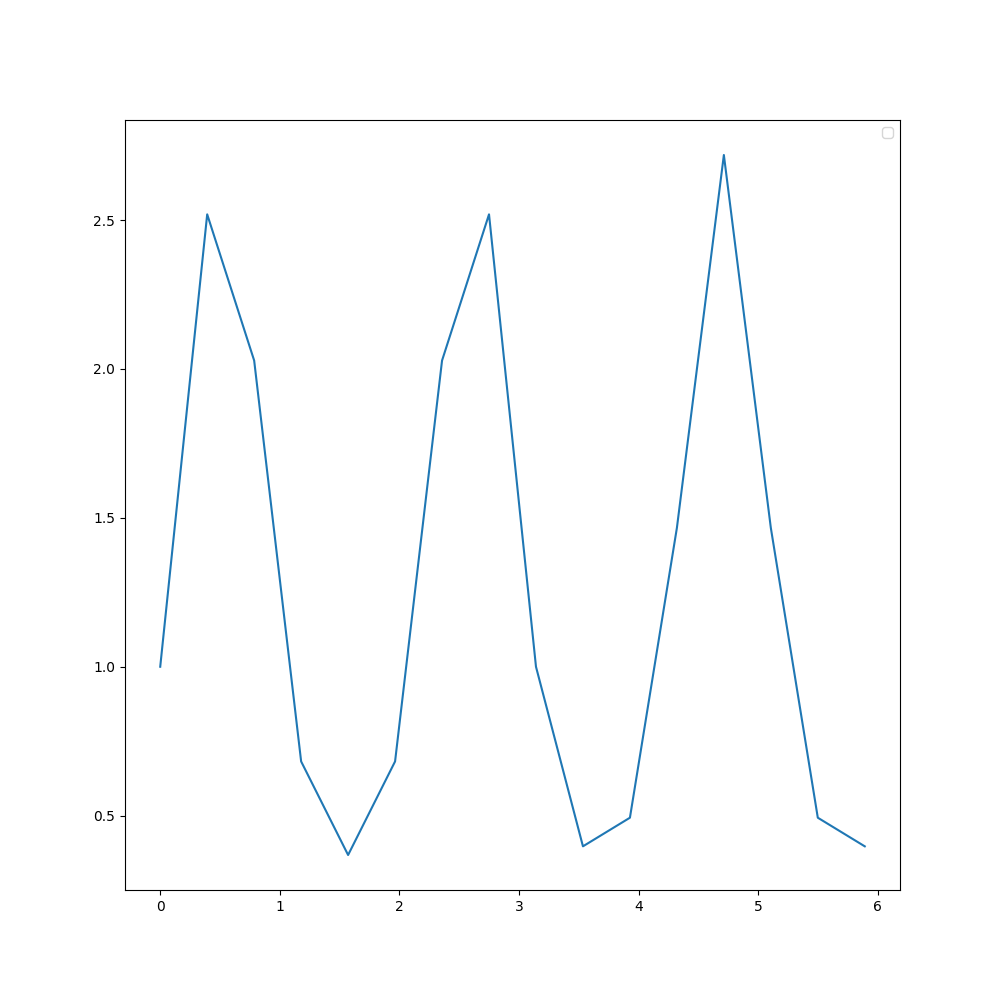

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(x,u)
ax.legend()

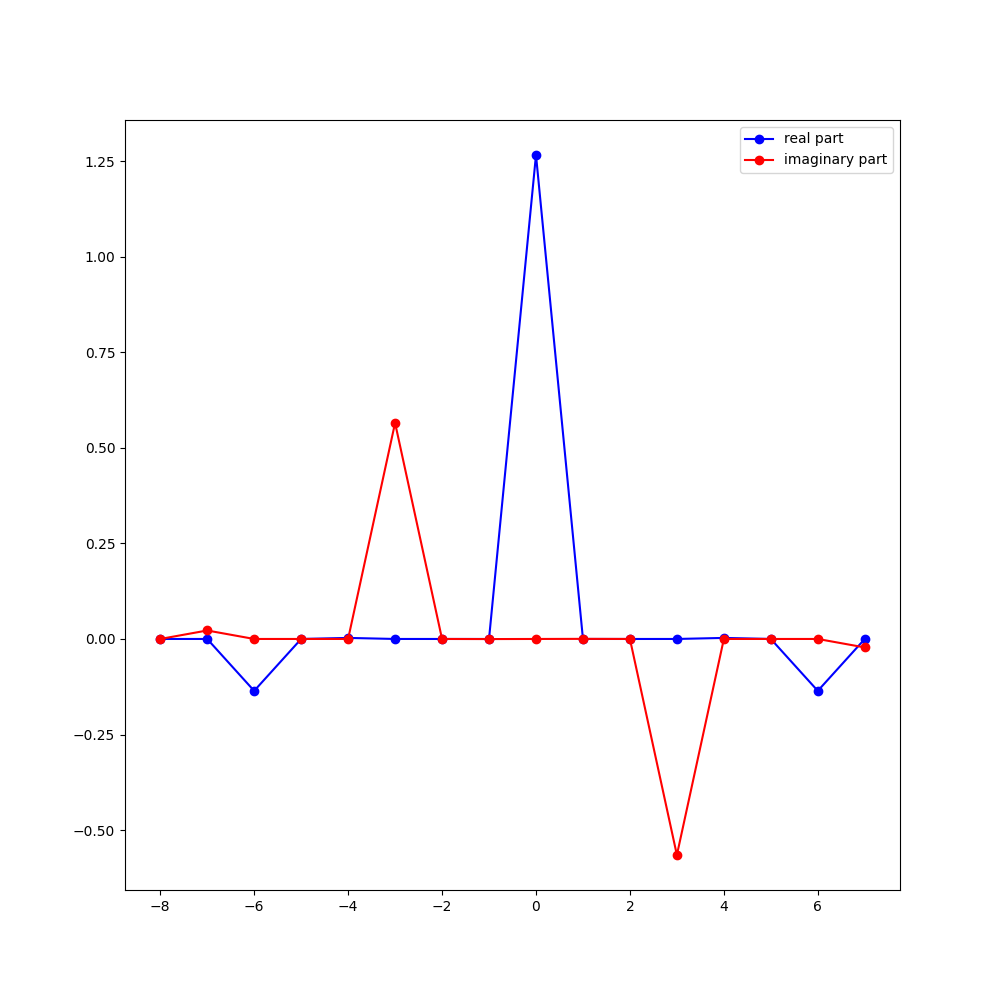

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(k,np.real(uk),color='b',marker='o',label='real part')
ax.plot(k,np.imag(uk),color='r',marker='o',label='imaginary part')
ax.legend()

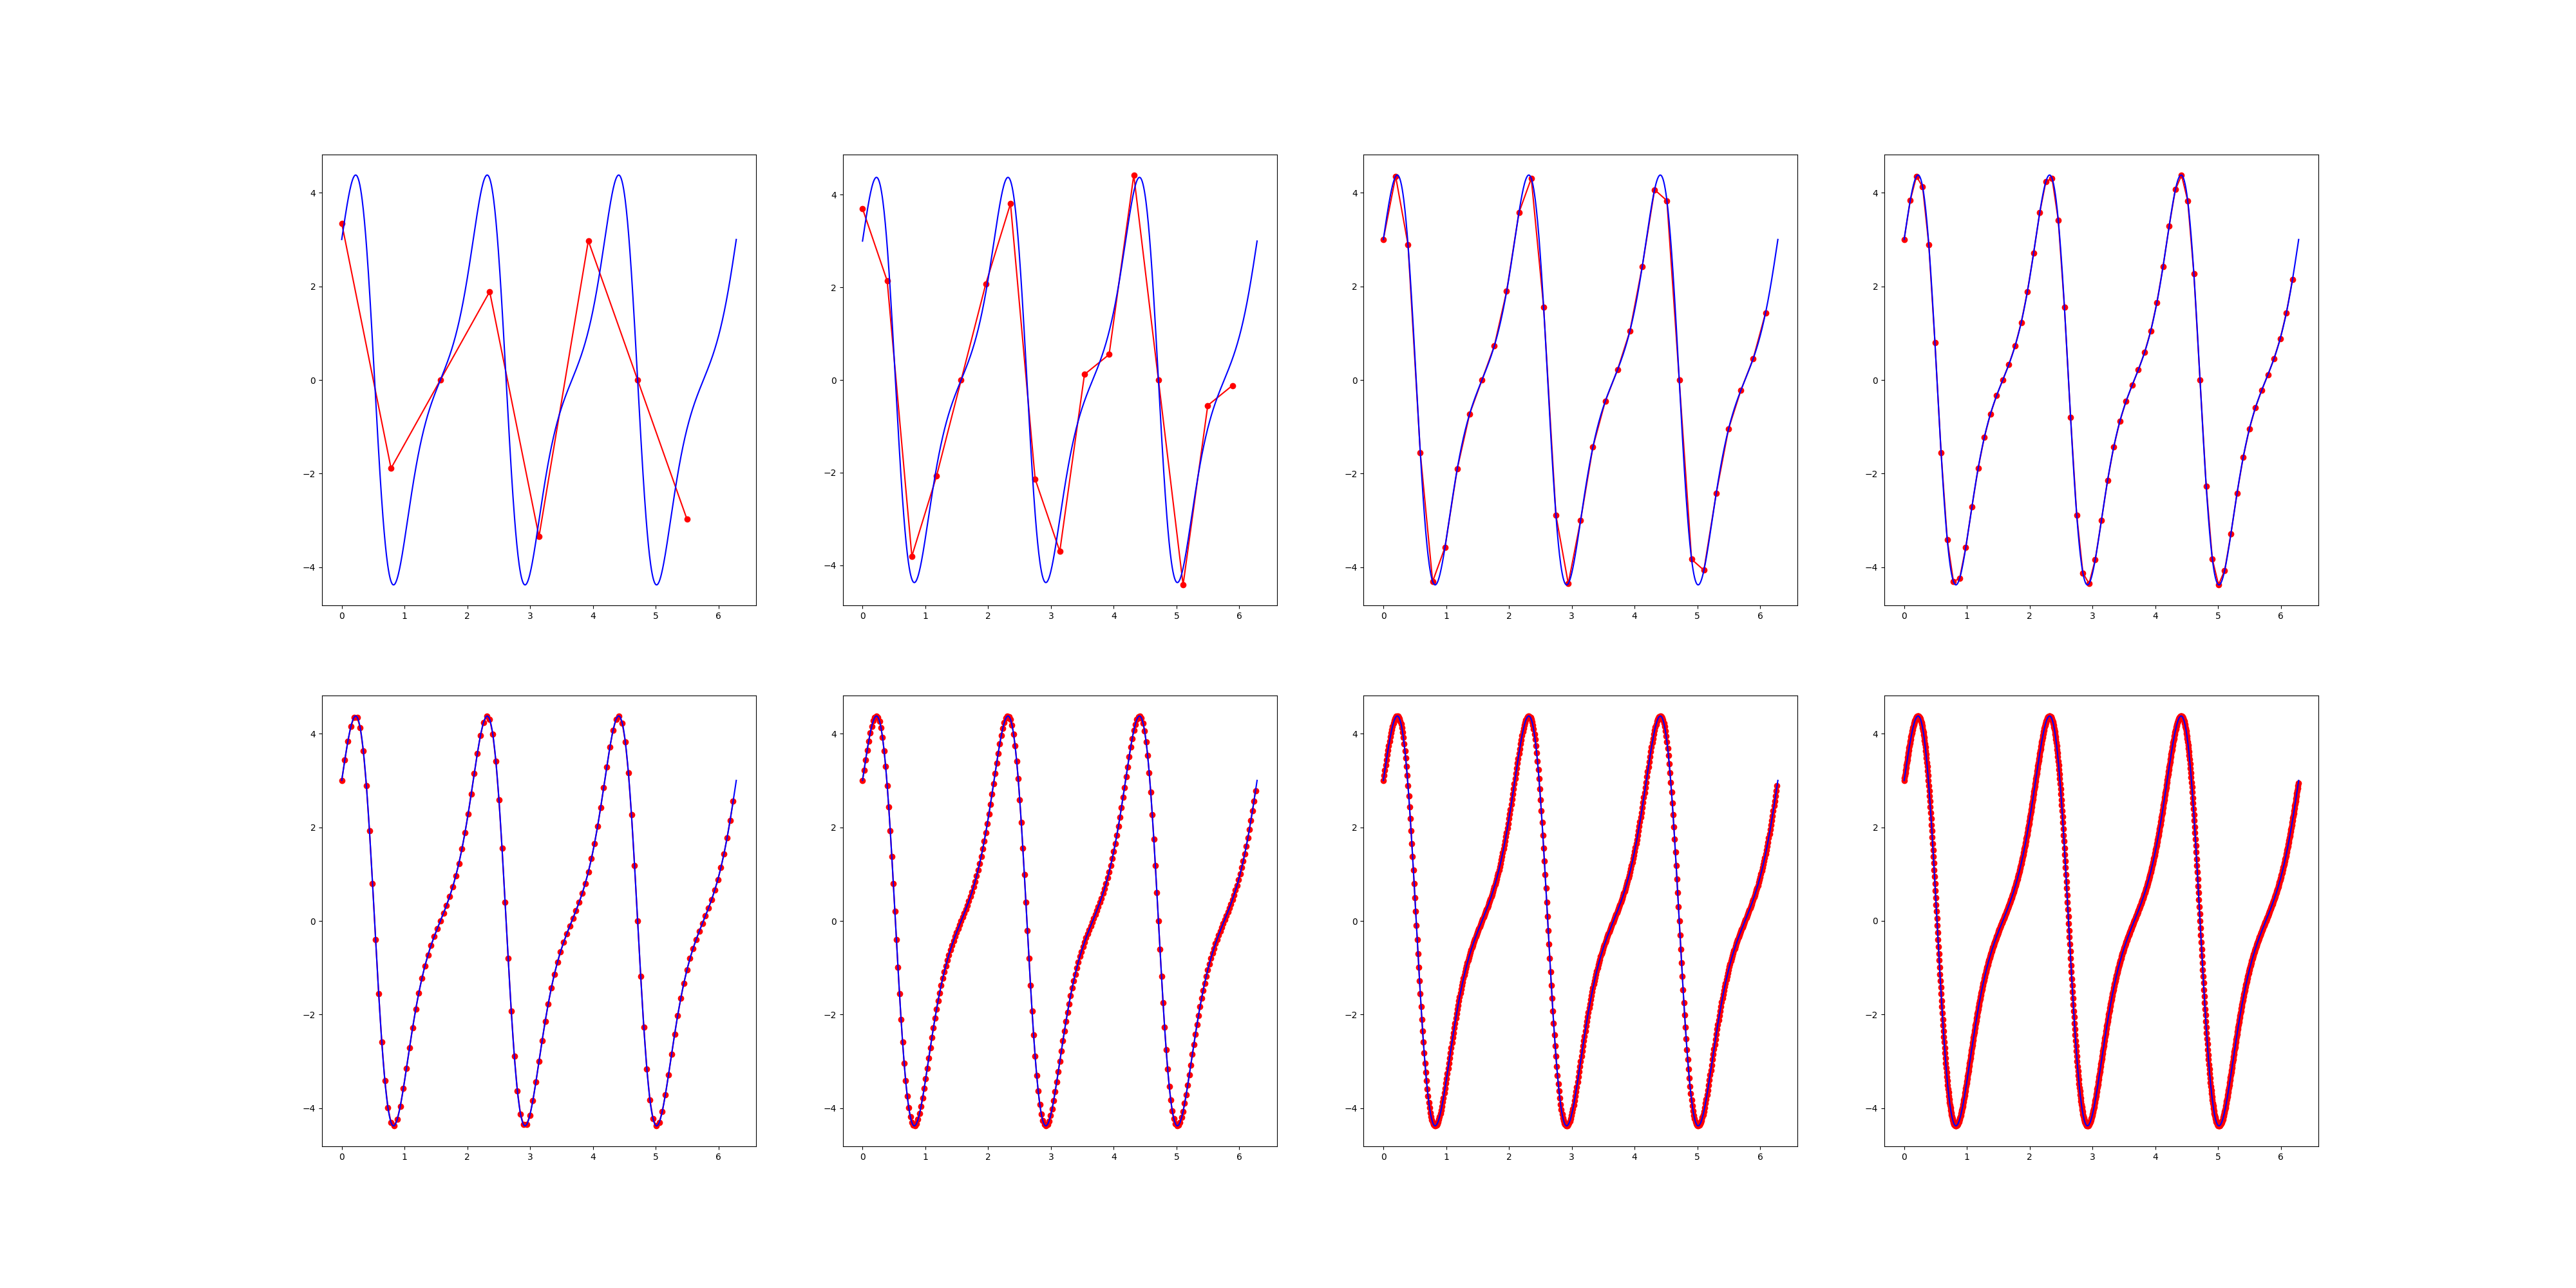

In [8]:
x_theor=np.linspace(0,2*np.pi,1024)
du_theor=3*np.cos(3*x_theor)*np.exp(np.sin(3*x_theor))
R=np.zeros(8)
fig=plt.figure(figsize=(40,20))
axs=[]
               
for i in range(8):
    axs.append(fig.add_subplot(2,4,i+1))
i=0
for N in [8,16,32,64,128,256,512,1024]:
    dx=L/N
    x=np.arange(0,2*np.pi,dx)
    u=np.exp(np.sin(3*x))
    uk=1/N*np.fft.fftshift(np.fft.fft(u))
    k=np.arange(-N/2,N/2,1)
    duk=1j*2*np.pi/L*k*uk
    du=np.fft.ifft(np.fft.ifftshift(duk*N))
    du_theor_sampled=3*np.cos(3*x)*np.exp(np.sin(3*x))
    axs[i].plot(x,np.real(du),marker='o',color='r')
    axs[i].plot(x_theor,du_theor,color='b')
    R[i]=np.sqrt(np.nanmean((np.real(du)-du_theor_sampled)**2))
    i=i+1
    

    

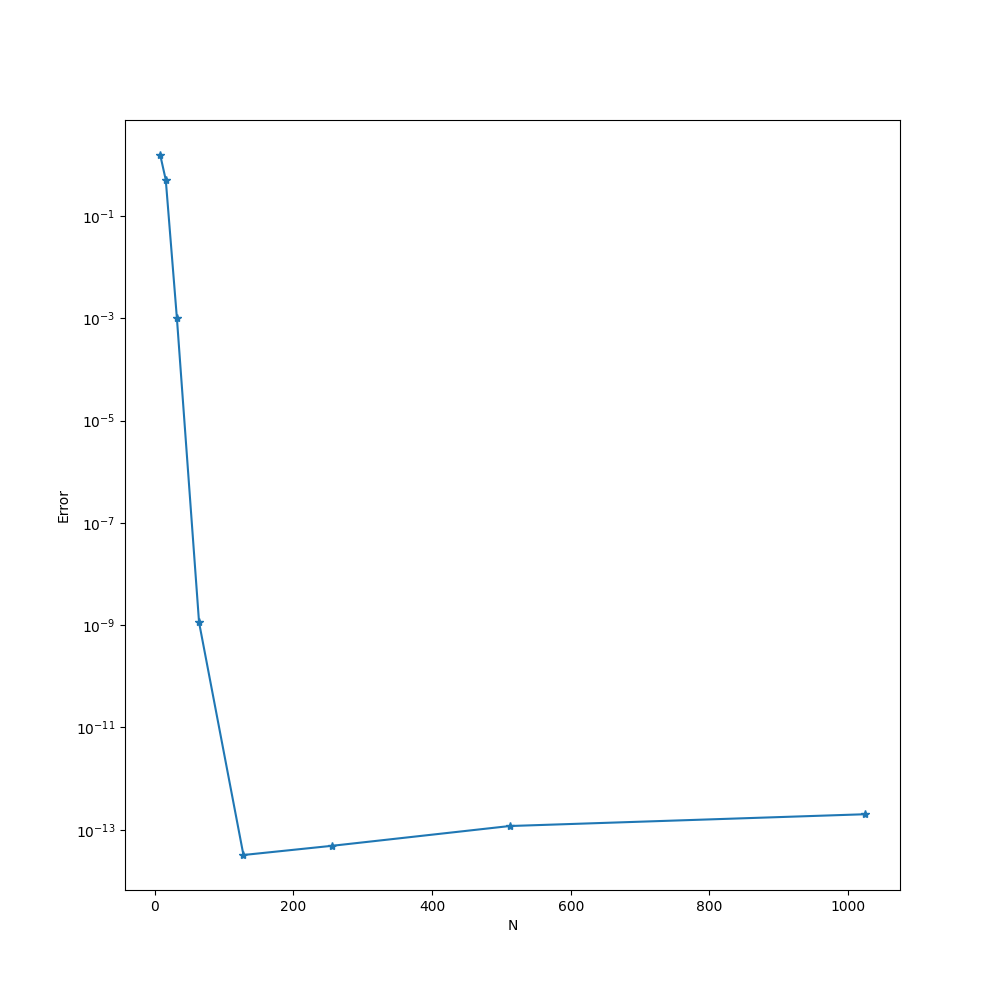

In [9]:

fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)

ax.plot([8,16,32,64,128,256,512,1024],R,'*-')
ax.set_xlabel('N')
ax.set_ylabel('Error')
ax.set_yscale('log')



/tmp/ipykernel_21195/825379348.py:2: RuntimeWarning: invalid value encountered in true_divide
  du_theor=3*np.sin(6*x_theor)/(2*np.abs(np.sin(3*x_theor)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in true_divide
  du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in true_divide
  du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in true_divide
  du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in true_divide
  du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in true_divide
  du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
/tmp/ipykernel_21195/825379348.py:18: RuntimeWarning: invalid value encountered in tr

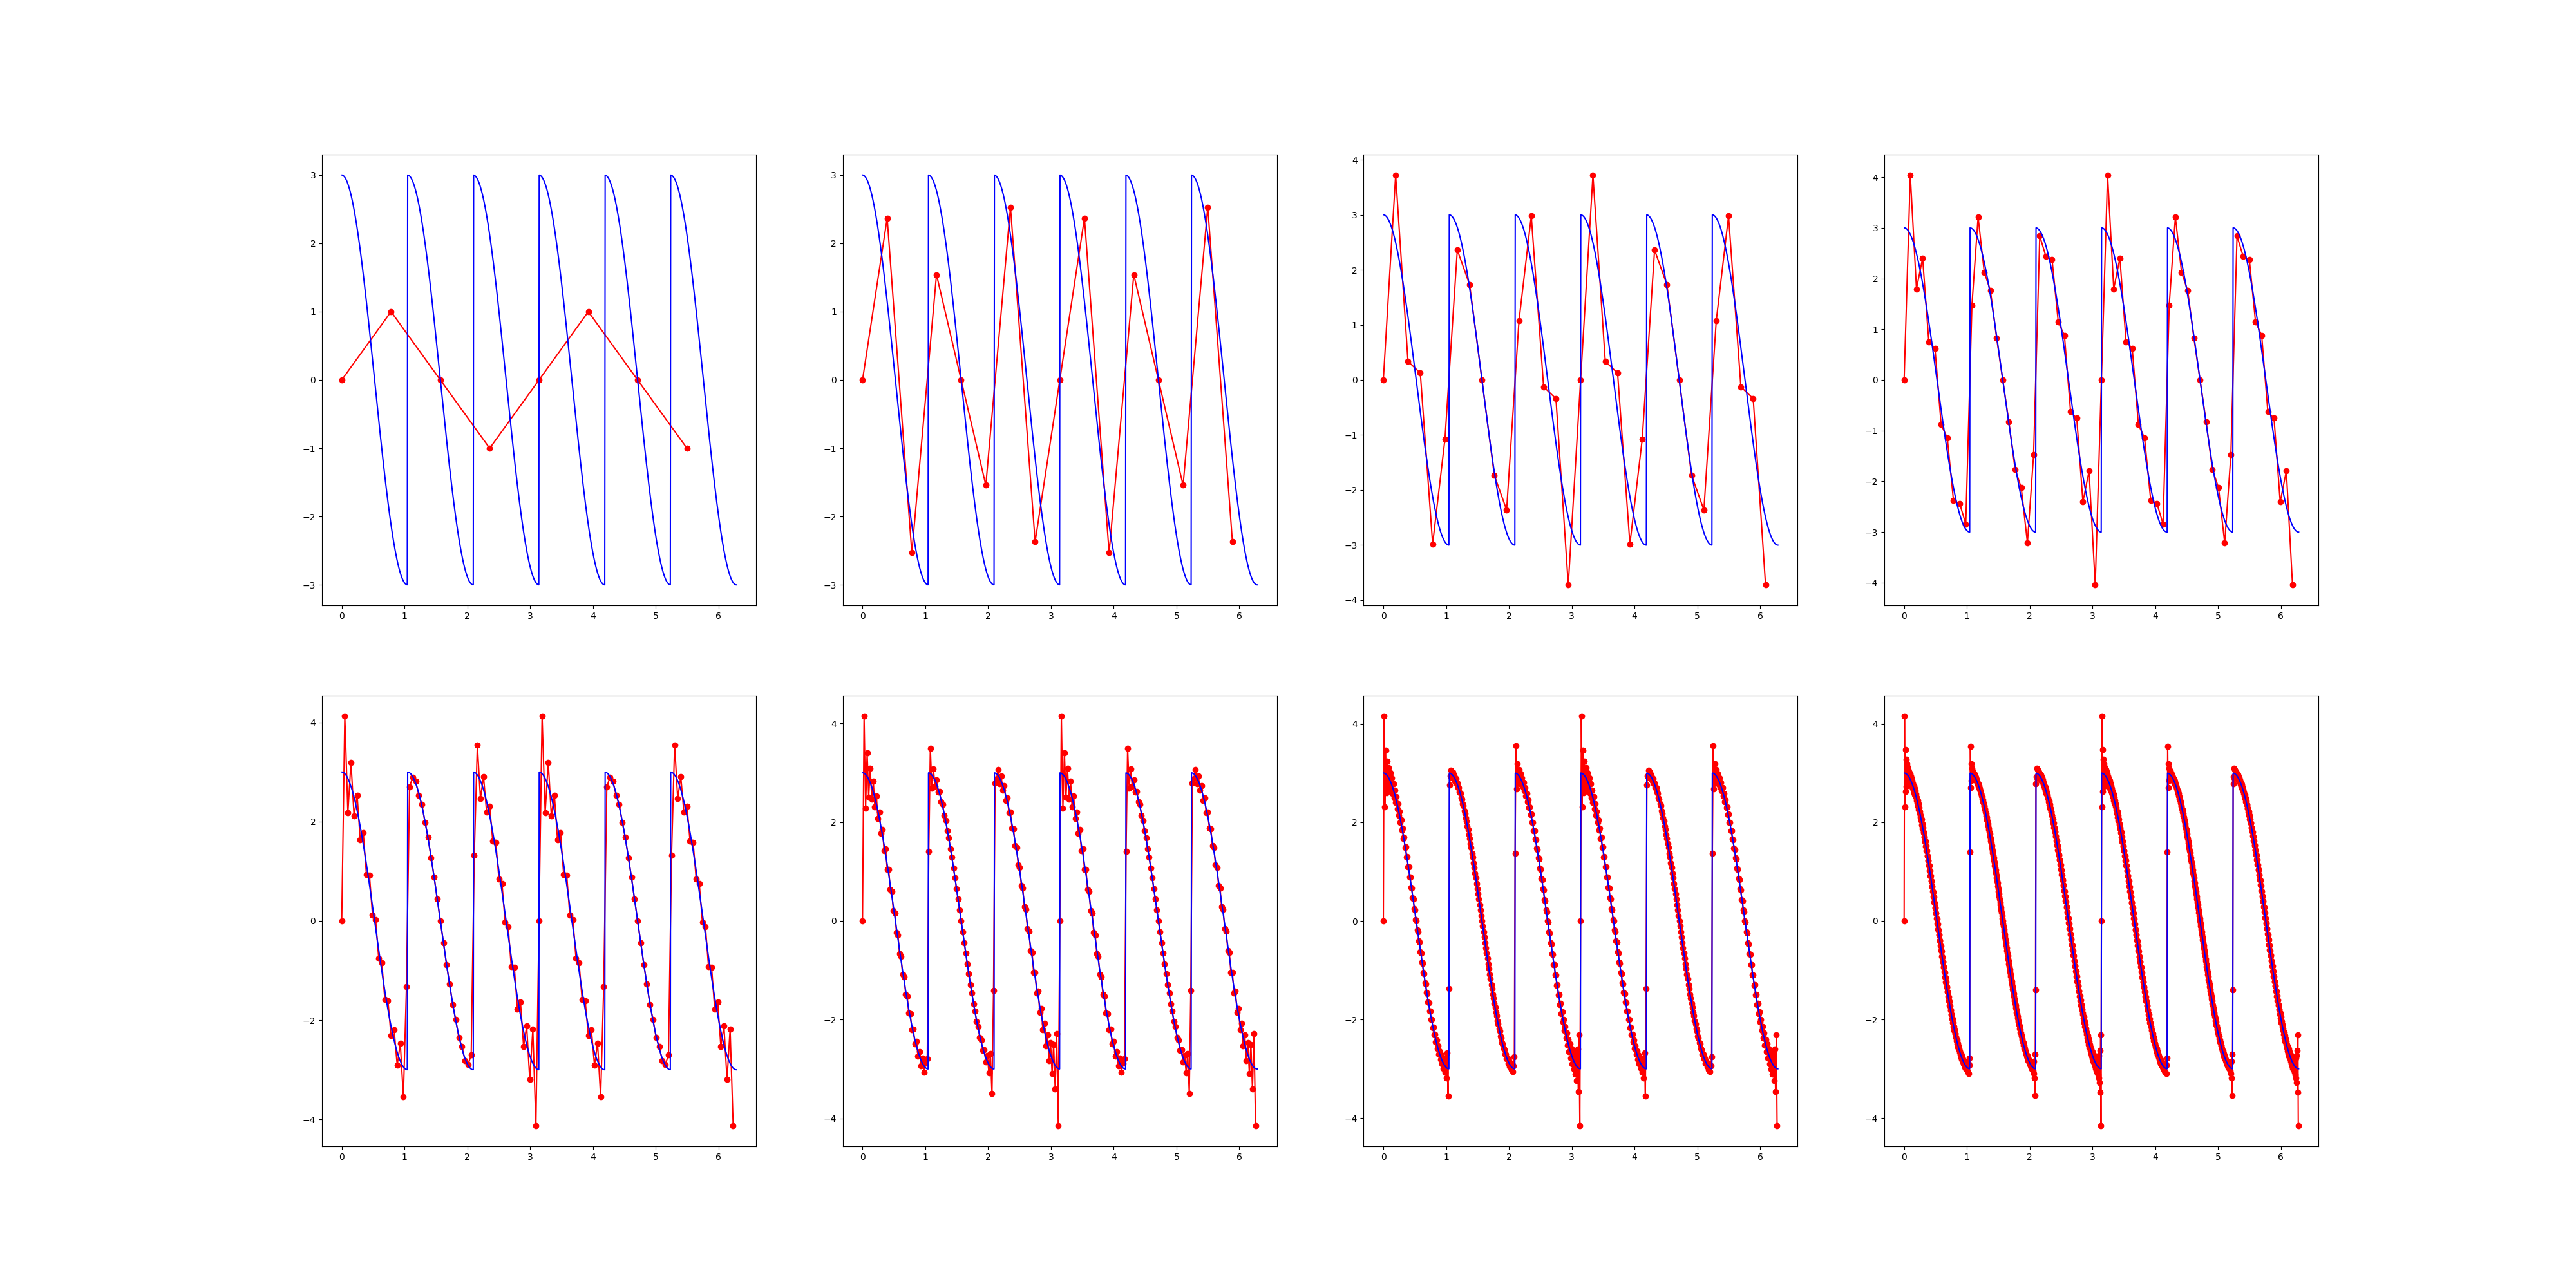

In [10]:
x_theor=np.linspace(0,2*np.pi,1024)
du_theor=3*np.sin(6*x_theor)/(2*np.abs(np.sin(3*x_theor)))
R=np.zeros(8)
fig=plt.figure(figsize=(40,20))
axs=[]
               
for i in range(8):
    axs.append(fig.add_subplot(2,4,i+1))
i=0
for N in [8,16,32,64,128,256,512,1024]:
    dx=L/N
    x=np.arange(0,2*np.pi,dx)
    u=np.abs(np.sin(3*x))
    uk=1/N*np.fft.fftshift(np.fft.fft(u))
    k=np.arange(-N/2,N/2,1)
    duk=1j*2*np.pi/L*k*uk
    du=np.fft.ifft(np.fft.ifftshift(duk*N))
    du_theor_sampled=3*np.sin(6*x)/(2*np.abs(np.sin(3*x)))
    axs[i].plot(x,np.real(du),marker='o',color='r')
    axs[i].plot(x_theor,du_theor,color='b')
    R[i]=np.sqrt(np.nanmean((np.real(du)-du_theor_sampled)**2))
    i=i+1
    


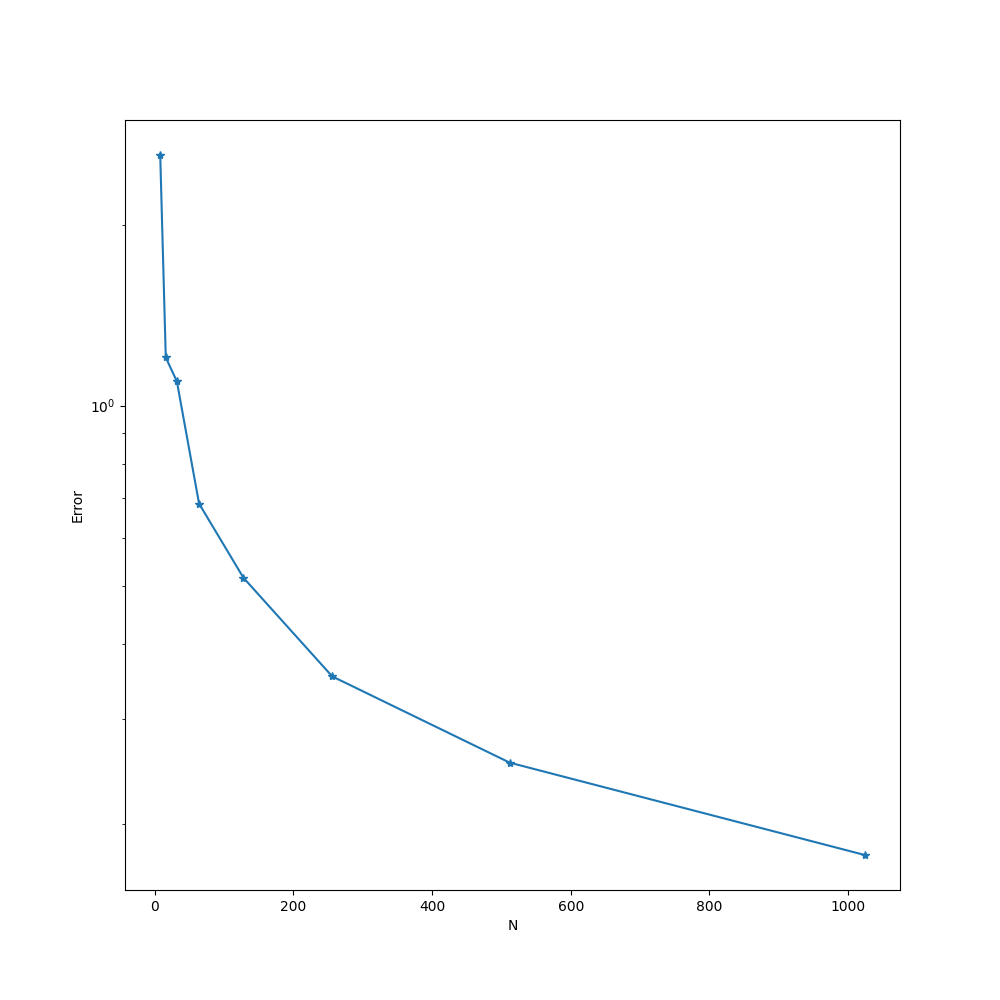

In [11]:

fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(1,1,1)

ax.plot([8,16,32,64,128,256,512,1024],R,'*-')
ax.set_xlabel('N')
ax.set_ylabel('Error')
ax.set_yscale('log')



In [14]:
N=64*2
L=2*np.pi
dx=L/N
x=np.arange(0,2*np.pi,dx)

k=np.arange(-N/2,N/2,1)
u = np.sin(x)+1*np.sin(10*x)
u = np.sin(x)+np.cos(10*x)+2*(np.random.random((N,))-0.5)
#filtering

filt=np.zeros(N)
kf=8
for i in range(np.shape(k)[0]):
    if k[i]>=-kf and k[i]<=kf:
        filt[i]=1

#print(filt)
#filt=np.ones(N)
#filt[:int(N/2)-kf]=0
#filt[int(N/2+1)+kf:]=0

uk= np.fft.fftshift(np.fft.fft(u))/N 
ukfilt=uk*filt

ufilt=np.fft.ifft(np.fft.ifftshift(ukfilt))*N

/home/lvander/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


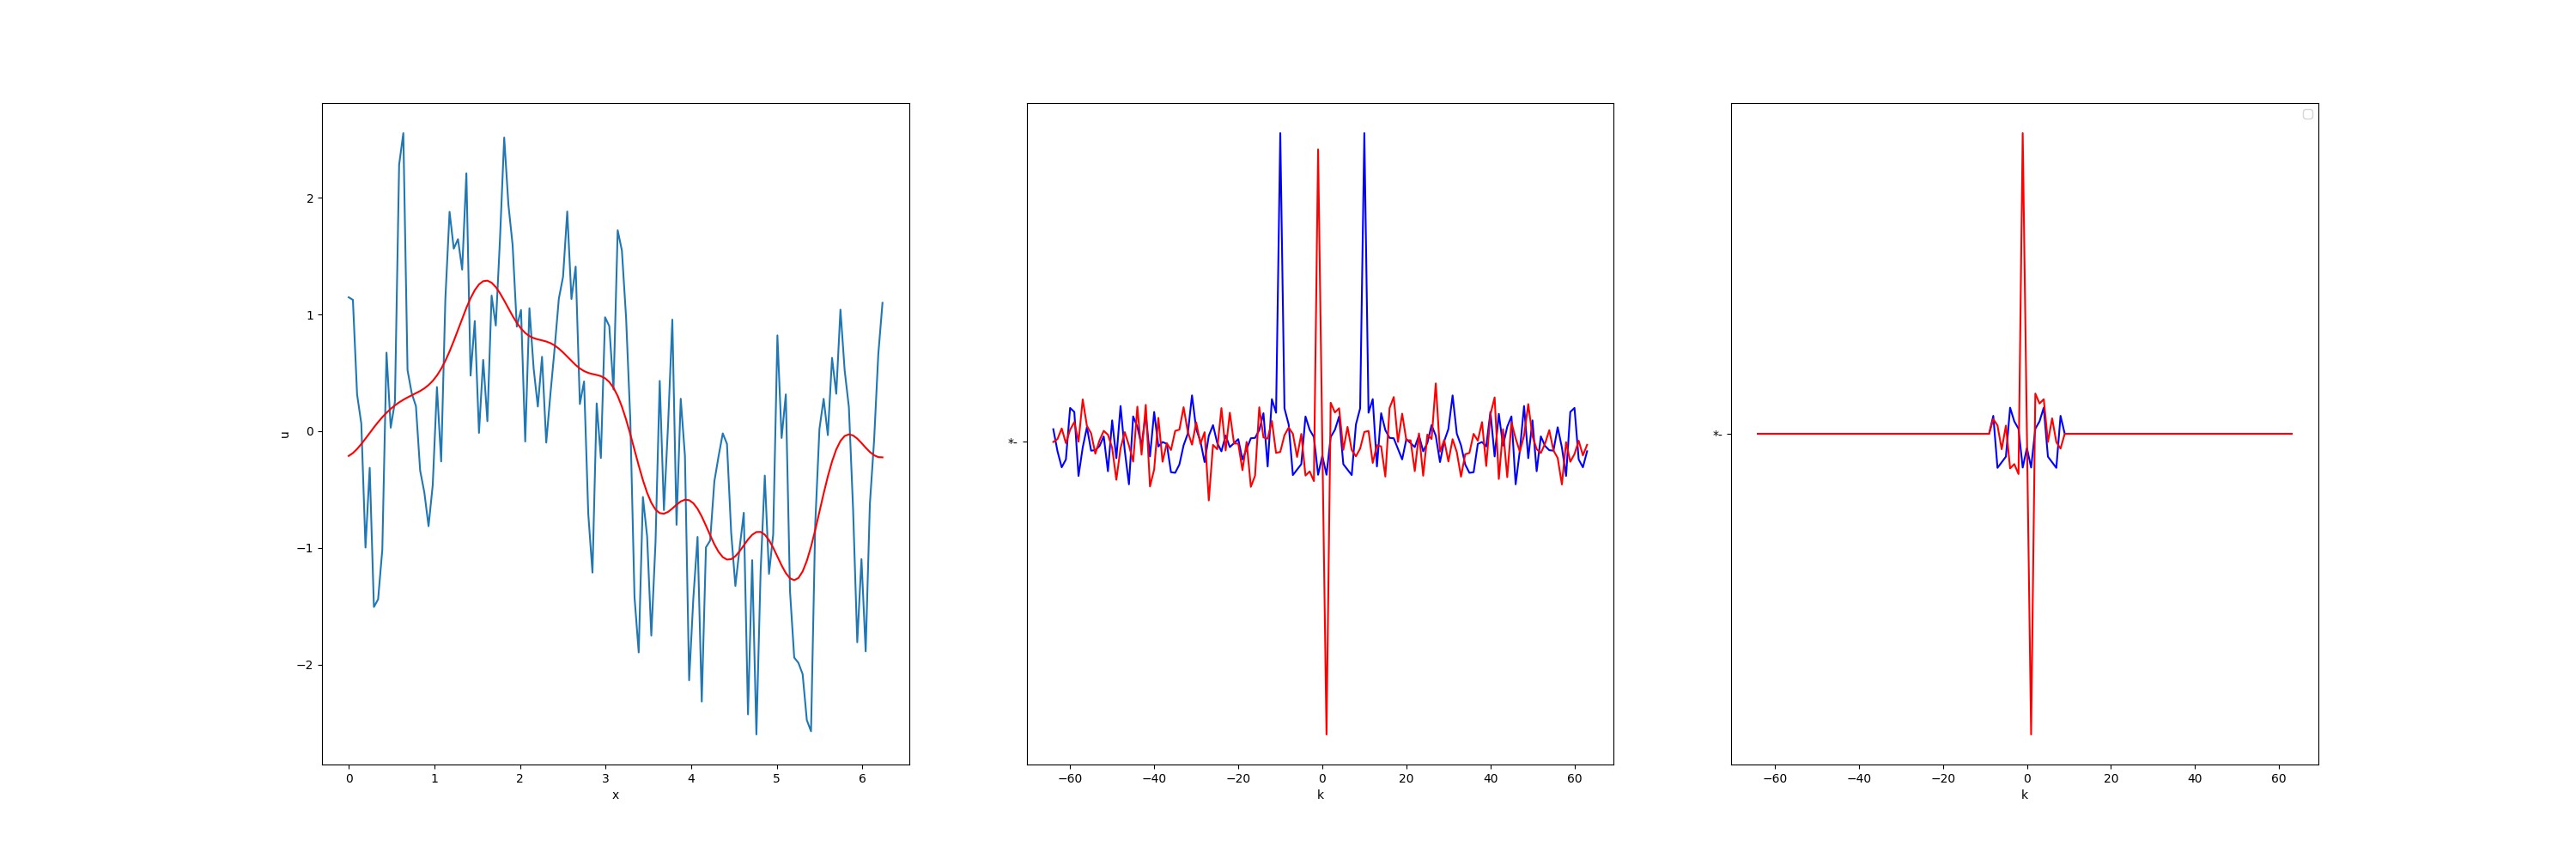

In [15]:

fig,ax = plt.subplots(1,3,figsize=(30,10))
ax[0].plot(x, u,'-',label='')
ax[0].plot(x, ufilt,'r',label='')
ax[0].set_xlabel('x')
ax[0].set_ylabel('u')
ax[1].plot(k,np.real(uk),'b','*-')
ax[1].plot(k,np.imag(uk),'r','*-')
ax[1].set_xlabel('k')
ax[2].plot(k,np.real(ukfilt),'b','*-')
ax[2].plot(k,np.imag(ukfilt),'r','*-')
ax[2].set_xlabel('k')

plt.legend()

# Advection equation

In [14]:
L=2*np.pi
c=2*np.pi/10

N=128
L=2*np.pi
dx=L/N
x=np.arange(0,2*np.pi,dx)

tmax=20
dt=0.01/(2*np.pi)*dx/c
M=int(tmax/dt)+1
t=2*np.pi/L*np.linspace(0,tmax,M)

#Wavenumber
k=np.arange(-N/2,N/2,1)

U_k=np.zeros((N,M),dtype='complex')

#Initial condition
stdwave=L/20
U0 = np.exp(-((x-L/5)**2)/(stdwave**2));
U_k[:,0]=np.fft.fftshift(np.fft.fft(U0))


for i in range(M-1):
    U_k[:,i+1]=U_k[:,i]+dt*(-c)*1j*k*U_k[:,i]
    



In [15]:
U=np.zeros((N,M))
for i in range(M):
    U[:,i]=np.real(np.fft.ifft(np.fft.ifftshift(U_k[:,i])))

Text(0.5, 1.0, 'Final spectrum')

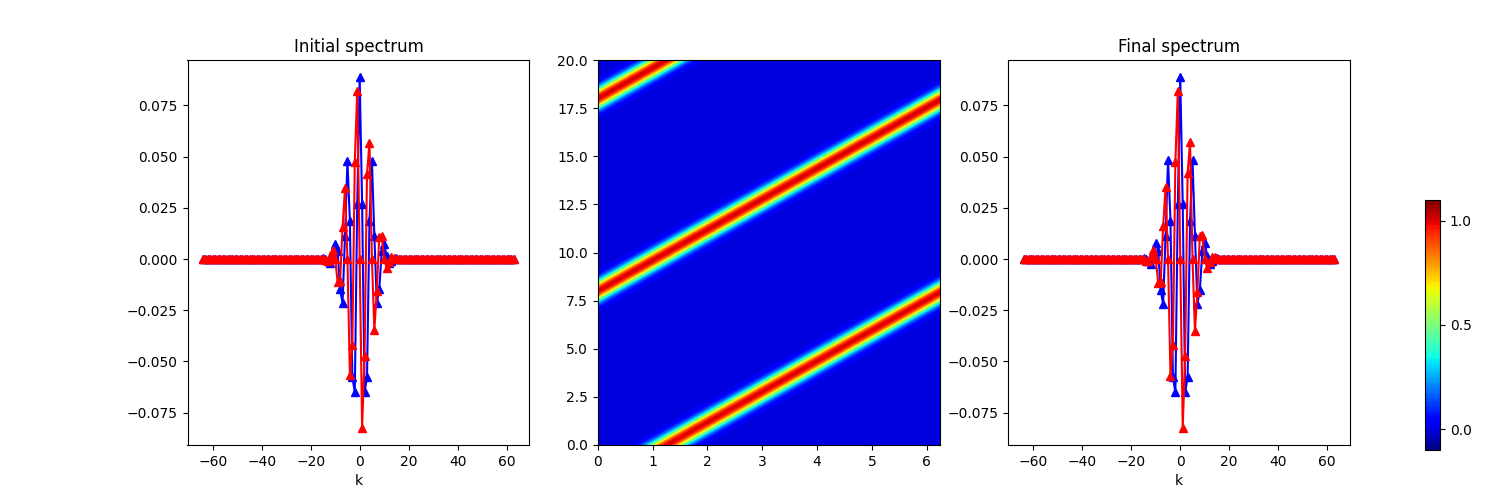

In [16]:
xx,tt=np.meshgrid(x,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(k,np.real(U_k[:,0]/N),color='b',marker='^',label='Real part')
ax[0].plot(k,np.imag(U_k[:,0]/N),color='r',marker='^',label='Imaginary part')
ax[0].set_xlabel('k')
ax[0].set_title('Initial spectrum')
contU=ax[1].contourf(xx,tt,U.T,np.linspace(-0.1,1.1,100),cmap=cm.jet)
#plt.colorbar(ticks=np.linspace(-0.1,1.1,13))
cax = plt.axes([0.95, 0.1,0.01,0.5])
ticks_cbar=np.linspace(0,np.ceil(np.max(np.max(U))),5)
plt.colorbar(contU,cax=cax,orientation='vertical',ticks=ticks_cbar)
ax[2].plot(k,np.real(U_k[:,-1]/N),color='b',marker='^',label='Real part')
ax[2].plot(k,np.imag(U_k[:,-1]/N),color='r',marker='^',label='Imaginary part')
ax[2].set_xlabel('k')
ax[2].set_title('Final spectrum')


# Diffusion equation

In [16]:
L=2*np.pi
D=1


N=64
L=2*np.pi
dx=L/N
x=np.arange(0,2*np.pi,dx)

#Wavenumber
k=np.arange(-N/2,N/2,1)


tmax=10
dt=dt=0.1/(D*np.max(k*k))
M=int(tmax/dt)+1
t=2*np.pi/L*np.linspace(0,tmax,M)

#Wavenumber
k=np.arange(-N/2,N/2,1)

U_k=np.zeros((N,M),dtype='complex')

#Initial condition
stdwave=L/20
U0 = 1-1/2*(np.cos(2*np.pi/L*x)+np.cos(2*np.pi/L*5*x))+0.1*2*(np.random.random((N,))-0.5)
U_k[:,0]=np.fft.fftshift(np.fft.fft(U0))


for i in range(M-1):
    U_k[:,i+1]=U_k[:,i]-dt*(D)*k**2*U_k[:,i]
    



In [17]:
U=np.zeros((N,M))
for i in range(M):
    U[:,i]=np.real(np.fft.ifft(np.fft.ifftshift(U_k[:,i])))

Text(0.5, 1.0, 'Final spectrum')

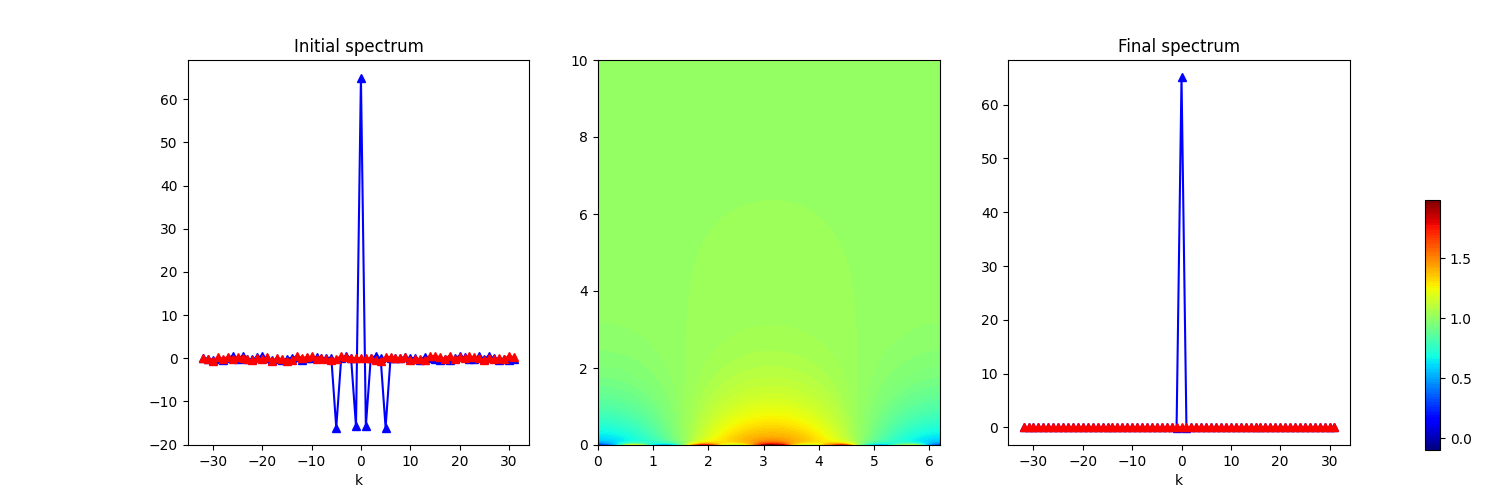

In [18]:
xx,tt=np.meshgrid(x,t)

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot(k,np.real(U_k[:,0]),color='b',marker='^',label='Real part')
ax[0].plot(k,np.imag(U_k[:,0]),color='r',marker='^',label='Imaginary part')
ax[0].set_xlabel('k')
ax[0].set_title('Initial spectrum')
contU=ax[1].contourf(xx,tt,U.T,np.linspace(-0.1,np.max(np.max(U)),100),cmap=cm.jet)
#plt.colorbar(ticks=np.linspace(-0.1,1.1,13))
cax = plt.axes([0.95, 0.1,0.01,0.5])
ticks_cbar=np.linspace(0,np.ceil(np.max(np.max(U))),5)
plt.colorbar(contU,cax=cax,orientation='vertical',ticks=ticks_cbar)
ax[2].plot(k,np.real(U_k[:,-1]),color='b',marker='^',label='Real part')
ax[2].plot(k,np.imag(U_k[:,-1]),color='r',marker='^',label='Imaginary part')
ax[2].set_xlabel('k')
ax[2].set_title('Final spectrum')
